In [280]:
# TOCHANGE

YOUR_POSTGRES_PASSWORD = '1234' 
YOUR_POSTGRES_PORT_NO = 5432 

# Default if you have cloned from repo-main 
host = 'localhost'
database = 'dsa3101' # default db name
user = 'postgres'

In [307]:
# Import necessary packages
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [282]:
# Connect to postgres
engine = create_engine(f'postgresql://{user}:{YOUR_POSTGRES_PASSWORD}@{host}:{YOUR_POSTGRES_PORT_NO}/{database}')

2. How can we improve customer retention and lifetime value?
- Calculate customer churn rates and identify at-risk customers. 
- Analyze the effectiveness of current retention strategies.


In [283]:
# Query online_sales data into pandas dataframe
sales_df = pd.read_sql("SELECT * FROM online_sales", engine)
sales_df.drop(['Delivery_Charges'], axis=1, inplace=True)
sales_df

,user_id,transaction_id,date,product_id,Quantity,Coupon_Status,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,B09DL9978Y,1,Used,ELEC10,0.1
1,17850,16680,2019-01-01,B09DL9978Y,1,Used,ELEC10,0.1
2,17850,16681,2019-01-01,B07GXHC691,1,Used,OFF10,0.1
3,17850,16682,2019-01-01,B08NCKT9FG,5,Not Used,SALE10,0.1
4,17850,16682,2019-01-01,B08H21B6V7,1,Used,AIO10,0.1
...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,1,Clicked,ELEC30,0.3
53697,14410,48494,2019-12-31,B09WN3SRC7,1,Used,SALE30,0.3
53698,14410,48495,2019-12-31,B07VX71FZP,1,Used,ELEC30,0.3
53699,14600,48496,2019-12-31,B00Y4ORQ46,5,Clicked,ELEC30,0.3


In [252]:
# Query products data into pandas dataframe
products_df = pd.read_sql("SELECT * FROM products", engine)
products_df.drop(['about_product', 'discounted_price', 'discount_percentage'], axis=1, inplace=True)
products_df

,product_id,product_name,category,actual_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,13.19
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.19
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,22.79
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,8.39
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.79
...,...,...,...,...
1346,B00TI8E7BI,Philips HD9306/06 1.5-Litre Electric Kettle (M...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,32.34
1347,B07J9KXQCC,"Libra Room Heater for Home, Room Heaters Home ...","Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",27.59
1348,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",11.99
1349,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,11.03


In [253]:
# Left join on both dataframes
df_2019 = pd.merge(sales_df, products_df, on='product_id', how='left')

# Reorder columns
df_2019 = df_2019[['user_id', 'transaction_id', 'date', 'product_id', 'product_name', 'category', 'Coupon_Code',
         'Coupon_Status', 'Discount_pct', 'Quantity', 'actual_price']]
df_2019

,user_id,transaction_id,date,product_id,product_name,category,Coupon_Code,Coupon_Status,Discount_pct,Quantity,actual_price
0,17850,16679,2019-01-01,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",ELEC10,Used,0.1,1,55.08
1,17850,16680,2019-01-01,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",ELEC10,Used,0.1,1,55.08
2,17850,16681,2019-01-01,B07GXHC691,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,Electronics|Mobiles&Accessories|MobileAccessor...,OFF10,Used,0.1,1,5.99
3,17850,16682,2019-01-01,B08NCKT9FG,Boat A 350 Type C Cable 1.5m(Jet Black),Computers&Accessories|Accessories&Peripherals|...,SALE10,Not Used,0.1,5,9.58
4,17850,16682,2019-01-01,B08H21B6V7,Nokia 150 (2020) (Cyan),Electronics|Mobiles&Accessories|Smartphones&Ba...,AIO10,Used,0.1,1,35.99
...,...,...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,Electronics|Cameras&Photography|SecurityCamera...,ELEC30,Clicked,0.3,1,39.59
53697,14410,48494,2019-12-31,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,1678.80
53698,14410,48495,2019-12-31,B07VX71FZP,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",ELEC30,Used,0.3,1,24.00
53699,14600,48496,2019-12-31,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Clicked,0.3,5,9.54


In [254]:
# Add a Quarter column
position = df_2019.columns.get_loc('date') + 1
df_2019.insert(loc=position, column='quarter', value= df_2019['date'].dt.quarter)
df_2019

,user_id,transaction_id,date,quarter,product_id,product_name,category,Coupon_Code,Coupon_Status,Discount_pct,Quantity,actual_price
0,17850,16679,2019-01-01,1,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",ELEC10,Used,0.1,1,55.08
1,17850,16680,2019-01-01,1,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",ELEC10,Used,0.1,1,55.08
2,17850,16681,2019-01-01,1,B07GXHC691,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,Electronics|Mobiles&Accessories|MobileAccessor...,OFF10,Used,0.1,1,5.99
3,17850,16682,2019-01-01,1,B08NCKT9FG,Boat A 350 Type C Cable 1.5m(Jet Black),Computers&Accessories|Accessories&Peripherals|...,SALE10,Not Used,0.1,5,9.58
4,17850,16682,2019-01-01,1,B08H21B6V7,Nokia 150 (2020) (Cyan),Electronics|Mobiles&Accessories|Smartphones&Ba...,AIO10,Used,0.1,1,35.99
...,...,...,...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,4,B07XLML2YS,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,Electronics|Cameras&Photography|SecurityCamera...,ELEC30,Clicked,0.3,1,39.59
53697,14410,48494,2019-12-31,4,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,1678.80
53698,14410,48495,2019-12-31,4,B07VX71FZP,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",ELEC30,Used,0.3,1,24.00
53699,14600,48496,2019-12-31,4,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Clicked,0.3,5,9.54


In [284]:
#Generating synthetic data for 2018

# Set seed for reproducibility
np.random.seed(3101)

# Number of synthetic transactions for 2018
n_transactions = len(df_2019)

# Generate synthetic transaction IDs (unique)
transaction_ids = np.arange(1, n_transactions + 1)

# Generate random dates in 2018
start_date = pd.to_datetime("2018-01-01")
end_date = pd.to_datetime("2018-12-31")
transaction_dates = start_date + (end_date - start_date) * np.random.rand(n_transactions)

# Generate synthetic product_ids sampled from the 2019 data
product_ids = np.random.choice(df_2019['product_id'].unique(), size=n_transactions)

# Generate synthetic quantities
quantities = np.random.randint(1, df_2019['Quantity'].mean(), size=n_transactions)

# Create the synthetic 2018 dataset
df_2018 = pd.DataFrame({
    'transaction_id': transaction_ids,
    'date': transaction_dates,
    'product_id': product_ids,
    'Quantity': quantities,
})

# Left join with the products table
df_2018 = pd.merge(df_2018, products_df, on='product_id', how='left')

# Reorder columns
df_2018 = df_2018[['transaction_id', 'date', 'product_id', 'product_name', 'category', 'Quantity', 'actual_price']]

# Add quarter column
df_2018.insert(loc=df_2018.columns.get_loc('date') + 1, column='quarter', value= df_2018['date'].dt.quarter)

# Add empty columns to simulate no coupon strategy is used

df_2018.insert(loc = df_2018.columns.get_loc('category') + 1, column='Coupon_Code', value=np.nan)
df_2018.insert(loc = df_2018.columns.get_loc('Coupon_Code') + 1, column='Coupon_Status', value=np.nan)
df_2018.insert(loc = df_2018.columns.get_loc('Coupon_Status') + 1, column='Discount_pct', value=0)

# Generate synthetic user_ids based on 2019 data

# Create a dictionary with unique user_ids for each quarter in 2019

unique_users_per_quarter_2019 = df_2019.groupby('quarter')['user_id'].unique().to_dict()

# Create a function to assign similar user ids which appears in each quarter in 2019 to each quarter in 2018.
def assign_user_ids(row):
    quarter = row['quarter']
    unique_users = unique_users_per_quarter_2019.get(quarter, [])
    return np.random.choice(unique_users, size=1)[0]

# Assign user ids
df_2018.insert(loc = 0, column = 'user_id', value=df_2018.apply(assign_user_ids, axis=1))

# Randomly remove 20% of rows to simulate poorer performance due to no retention strategy

df_2018= df_2018.sample(frac=0.8, random_state=42)
df_2018 = df_2018.reset_index(drop=True)
df_2018

,user_id,transaction_id,date,quarter,product_id,product_name,category,Coupon_Code,Coupon_Status,Discount_pct,Quantity,actual_price
0,14060,47869,2018-09-04 07:15:18.069113488,3,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,NaN,NaN,0,3,239.99
1,12763,8410,2018-02-13 20:07:57.572605265,1,B0B61HYR92,"Lapster usb 2.0 mantra cable, mantra mfs 100 d...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,3,11.99
2,17306,32280,2018-11-08 21:43:30.100820232,4,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",NaN,NaN,0,3,55.08
3,16250,2550,2018-02-09 08:16:14.340659355,1,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...",Electronics|Mobiles&Accessories|Smartphones&Ba...,NaN,NaN,0,1,251.88
4,18075,21500,2018-04-15 05:12:02.958520094,2,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,2,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...
42956,13050,7940,2018-03-19 08:18:23.827912967,1,B09PNR6F8Q,realme 10W Fast Charging Micro-USB Cable (Brai...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,1,4.79
42957,15270,16106,2018-11-25 15:27:11.847462500,4,B09NY6TRXG,"POCO C31 (Royal Blue, 64 GB) (4 GB RAM)",Electronics|Mobiles&Accessories|Smartphones&Ba...,NaN,NaN,0,1,143.99
42958,14101,47408,2018-09-04 07:04:56.675688708,3,B0B2PQL5N3,"Lapster Gel Mouse pad with Wrist Rest , Gaming...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,1,11.99
42959,15057,40796,2018-11-28 03:30:28.963247864,4,B078W65FJ7,boAt BassHeads 900 On-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",NaN,NaN,0,2,29.88


In [257]:
#Combine 2018 and 2019 dataframe into a single dataframe
df = pd.concat([df_2018, df_2019], ignore_index=True)
df

,user_id,transaction_id,date,quarter,product_id,product_name,category,Coupon_Code,Coupon_Status,Discount_pct,Quantity,actual_price
0,14060,47869,2018-09-04 07:15:18.069113488,3,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,NaN,NaN,0.0,3,239.99
1,12763,8410,2018-02-13 20:07:57.572605265,1,B0B61HYR92,"Lapster usb 2.0 mantra cable, mantra mfs 100 d...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,3,11.99
2,17306,32280,2018-11-08 21:43:30.100820232,4,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",NaN,NaN,0.0,3,55.08
3,16250,2550,2018-02-09 08:16:14.340659355,1,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...",Electronics|Mobiles&Accessories|Smartphones&Ba...,NaN,NaN,0.0,1,251.88
4,18075,21500,2018-04-15 05:12:02.958520094,2,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,2,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...
96657,14410,48493,2019-12-31 00:00:00.000000000,4,B07XLML2YS,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,Electronics|Cameras&Photography|SecurityCamera...,ELEC30,Clicked,0.3,1,39.59
96658,14410,48494,2019-12-31 00:00:00.000000000,4,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,1678.80
96659,14410,48495,2019-12-31 00:00:00.000000000,4,B07VX71FZP,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",ELEC30,Used,0.3,1,24.00
96660,14600,48496,2019-12-31 00:00:00.000000000,4,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Clicked,0.3,5,9.54


In [258]:
#Create a total_spent column to indicate how much a customer spends each transaction

df['total_spent'] = df.apply(
    lambda row: row['actual_price'] * row['Quantity'] * (1 - row['Discount_pct'])
    if row['Coupon_Status'] == "Used" else row['actual_price'] * row['Quantity'], axis=1)
df

,user_id,transaction_id,date,quarter,product_id,product_name,category,Coupon_Code,Coupon_Status,Discount_pct,Quantity,actual_price,total_spent
0,14060,47869,2018-09-04 07:15:18.069113488,3,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,NaN,NaN,0.0,3,239.99,719.97
1,12763,8410,2018-02-13 20:07:57.572605265,1,B0B61HYR92,"Lapster usb 2.0 mantra cable, mantra mfs 100 d...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,3,11.99,35.97
2,17306,32280,2018-11-08 21:43:30.100820232,4,B09DL9978Y,Hindware Atlantic Compacto 3 Litre Instant wat...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",NaN,NaN,0.0,3,55.08,165.24
3,16250,2550,2018-02-09 08:16:14.340659355,1,B08VB34KJ1,"OPPO A74 5G (Fantastic Purple,6GB RAM,128GB St...",Electronics|Mobiles&Accessories|Smartphones&Ba...,NaN,NaN,0.0,1,251.88,251.88
4,18075,21500,2018-04-15 05:12:02.958520094,2,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,2,7.19,14.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96657,14410,48493,2019-12-31 00:00:00.000000000,4,B07XLML2YS,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,Electronics|Cameras&Photography|SecurityCamera...,ELEC30,Clicked,0.3,1,39.59,39.59
96658,14410,48494,2019-12-31 00:00:00.000000000,4,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,1678.80,1175.16
96659,14410,48495,2019-12-31 00:00:00.000000000,4,B07VX71FZP,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",ELEC30,Used,0.3,1,24.00,16.80
96660,14600,48496,2019-12-31 00:00:00.000000000,4,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Clicked,0.3,5,9.54,47.70


In [259]:
# Create a column to show year and quarter

df['year_quarter'] = df['date'].dt.to_period('Q')

# Count number of unique users in each year and quarter

grouped_df = df.groupby('year_quarter')['user_id'].nunique().reset_index()

# Rename the columns for clarity

grouped_df.columns = ['year_quarter', 'unique_users']
grouped_df

,year_quarter,unique_users
0,2018Q1,488
1,2018Q2,587
2,2018Q3,603
3,2018Q4,550
4,2019Q1,488
5,2019Q2,587
6,2019Q3,603
7,2019Q4,550


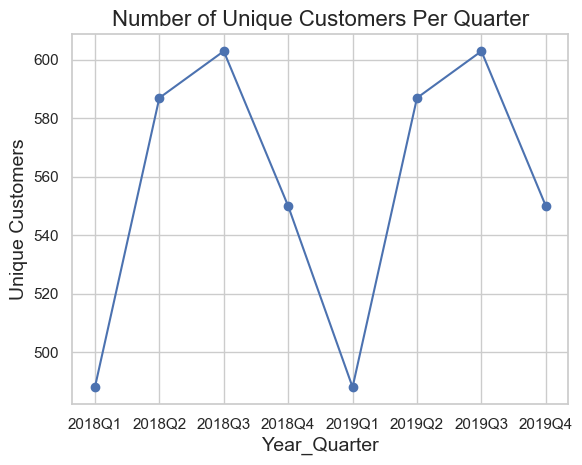

In [260]:
# Line plot for number of unique users in each year_quarter

plt.plot(grouped_df['year_quarter'].astype(str), grouped_df['unique_users'], marker='o', linestyle='-', color='b')
plt.title('Number of Unique Customers Per Quarter', fontsize=16)
plt.xlabel('Year_Quarter', fontsize=14)
plt.ylabel('Unique Customers', fontsize=14)
plt.show()

In [261]:
# Calculating churn rate

# Churn rate will be defined quarterly. 
# A user that makes a transaction in the previous quarter but not in the next quarter will be marked as churned.

# Group unique users into the respective year and quarter
customers_per_quarter = df.groupby('year_quarter')['user_id'].unique().reset_index()

# Define a function to calculate churn rate

def calculate_churn_rate(customers_per_quarter):
    churn_rates = []
    
    for i in range(1, len(customers_per_quarter)):
        current_customers = set(customers_per_quarter['user_id'].iloc[i])
        previous_customers = set(customers_per_quarter['user_id'].iloc[i - 1])
        
        #Taking a set difference to identify customers present in the previous quarter but not in the current quarter
        churned_customers = previous_customers - current_customers
        
        # Churn rate: percentage of previous customers who churned
        churn_rate = len(churned_customers) / len(previous_customers)
        
        churn_rates.append({
            'year_quarter': customers_per_quarter['year_quarter'].iloc[i],
            'churn_rate': churn_rate
        })
    
    return pd.DataFrame(churn_rates)

#Calculate churn rate per quarter

churn_rate_df = calculate_churn_rate(customers_per_quarter)

churn_rate_df

,year_quarter,churn_rate
0,2018Q2,0.641393
1,2018Q3,0.633731
2,2018Q4,0.691542
3,2019Q1,0.756364
4,2019Q2,0.641393
5,2019Q3,0.633731
6,2019Q4,0.691542


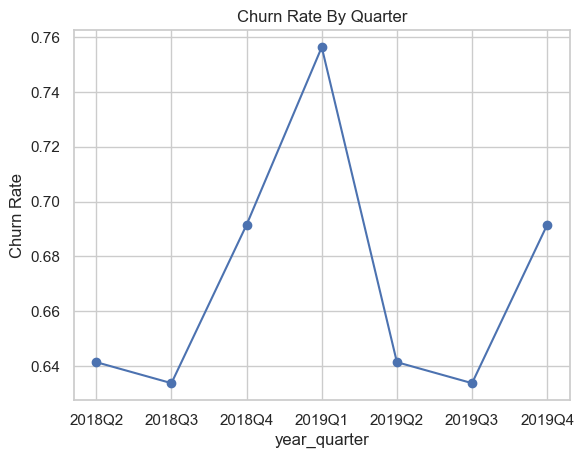

In [285]:
# Plot line graph to show churn rate from 2018 to 2019

churn_rate_df['year_quarter'] = churn_rate_df['year_quarter'].astype(str)

plt.plot(churn_rate_df['year_quarter'], churn_rate_df['churn_rate'], marker='o')
plt.title('Churn Rate By Quarter')  # Set the title
plt.xlabel('Year_Quarter')  # Set the x-label
plt.ylabel('Churn Rate')  # Set the y-label
plt.xticks(churn_rate_df['year_quarter'])  # Ensure all quarters are displayed
plt.show() 

## Analyze the effectiveness of the coupon retention strategy

In [286]:
# Coupon_Status consists of "Used", "Not Used" and "Clicked". 

# "Clicked" represents that the user tried to apply the coupon, but it is not applicable for the purchase

# "Clicked" will be remapped to "Not Used"

df['coupon_group'] = df['Coupon_Status'].apply(lambda x: 'Used' if x == 'Used' else 'Not Used')

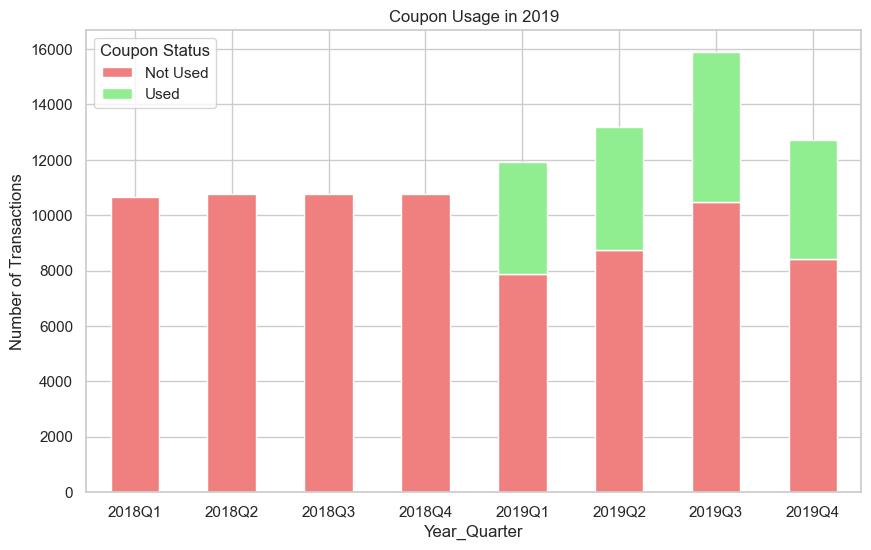

In [293]:
# Plot a stacked bar chart to show user's response to the coupon retention strategy in 2019

# Count coupons used or not used by year and quarter
coupon_counts = df.groupby(['year_quarter', 'coupon_group']).size().unstack()

# Plot the stacked bar chart

coupon_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Coupon Usage in 2019')
plt.xlabel('Year_Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=360)
plt.legend(title='Coupon Status')
plt.show()

From the stacked bar chart, we can see that the number of transactions is higher in 2019, after the retention strategy (Coupon) is applied.

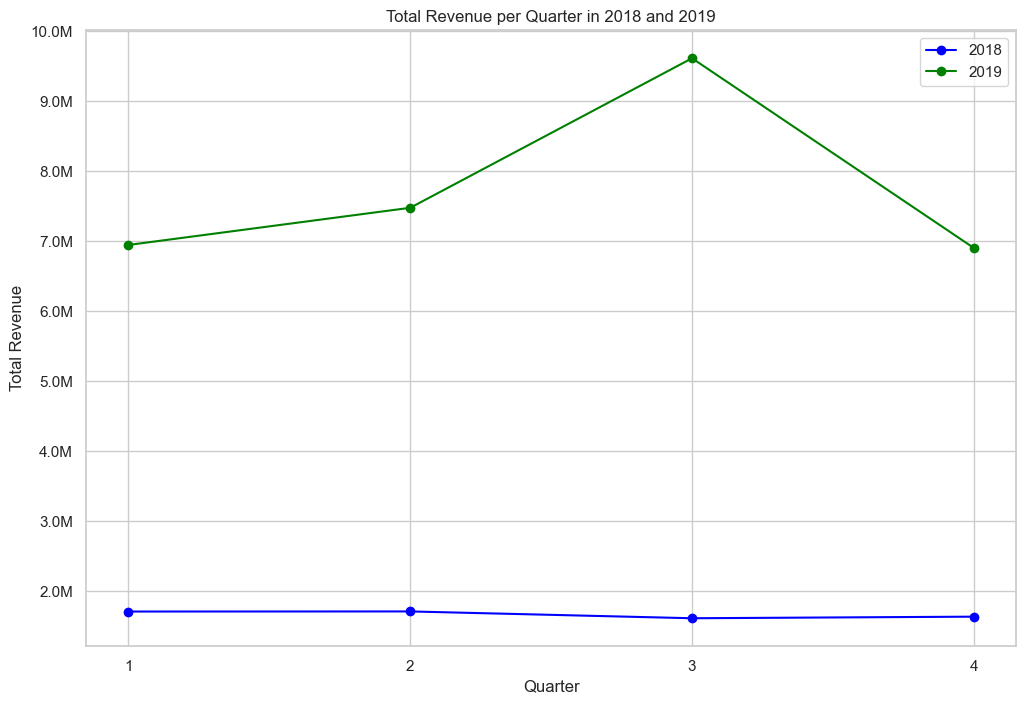

In [310]:
# Compare total revenue between 2018 and 2019

# Filter 2018 and 2019 data into seperate dataframes
revenue_2018 = df[df['date'].dt.year == 2018]
revenue_2019 = df[df['date'].dt.year == 2019]

# Calculate sum of revenue by quarter in each year
revenue_2018 = revenue_2018.groupby('quarter')['total_spent'].sum()
revenue_2019 = revenue_2019.groupby('quarter')['total_spent'].sum()

# Set plot size

plt.figure(figsize=(12, 8))

# Plot the revenue for 2018

plt.plot(revenue_2018.index.astype(str), revenue_2018.values, label='2018', color='blue', marker='o')

# Plot the revenue for 2019

plt.plot(revenue_2019.index.astype(str), revenue_2019.values, label='2019', color='green', marker='o')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))
plt.title('Total Revenue per Quarter in 2018 and 2019')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=360)
plt.legend()
plt.show()

From the line graph, we see that after the coupon retention strategy is used in 2019, total revenue by quarter increases with respect to the total revenue in 2018.

In terms of the total number of transactions and revenue, 2019 performed better than 2018 after the coupon strategy is applied. However, when we look at the churn rate, churn rate is relatively similar over the quarters from 2018 to 2019. This could mean that the coupon strategy was not effective in customer retention. Instead, it might have helped encourage customers to make more purchases and in higher quantities, leading to a higher total number of transactions and revenue.